In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np

In [2]:
demand_ids = ['a135e72b-8fb2-47d3-8f94-449a2012d02e', '5174cd1f-563d-4c49-8061-052a11fc6f37', '8a05ffa0-b6ee-4b07-a58e-4cb1aaa7bff5', 'b72062a7-4e5b-47fc-ade8-48c82d31281e', '9620e652-7154-46c3-8465-b55c04575105']

In [3]:
random_ids = '00fae55f-1242-4e20-a583-4fe3104b53f1', '0b1f1d08-cf9c-4f82-8f6c-c8bfda146a5f', 'b99c97b5-8185-489d-b502-d1ed569d9a70', '88926db5-eb6c-4038-9fee-2c02db869a37', 'a9e8f31c-d4e6-48c8-82db-beb738734428'

In [9]:
static_ids = ['261be8a6-5e7a-499f-a6b9-b3ac17c36ba4', '5dc9cc49-2010-4446-b811-b74fee7e8cdb', 'd677a3bf-0529-426e-8f7c-ce3328486e00', 'c285caff-dc70-415b-b7d5-c49b19936b61', 'ec22c95a-9e1b-4d8b-975a-0c36a3324a9f']

In [10]:
run_dir = "../experiments/runs"

In [11]:
def get_trajectories(sim_ids):
    trajectories = []
    for sim_id in sim_ids:
        df = pd.read_csv(os.path.join(run_dir, sim_id, "output.csv"))
        df['sim-id'] = sim_id
        trajectories.append(df)
    trajectories = pd.concat(trajectories, axis=0)
    trajectories['datetime'] = pd.to_datetime(trajectories['datetime'])
    trajectories['date'] = trajectories['datetime'].dt.date
    
    total_reward = trajectories[['date', 'display', 'revenue', 'sim-id']].groupby(["sim-id","display", "date"]).agg(
    {"revenue": sum}
    )
    total_reward.reset_index(inplace=True)
    mu = total_reward.groupby(['display', 'date']).agg({'revenue': np.mean}).reset_index()
    sig = total_reward.groupby(['display', 'date']).agg({'revenue': np.std}).reset_index()
    
    mu['upper'] = mu['revenue'] + sig['revenue']*1.96
    mu['lower'] = mu['revenue'] - sig['revenue']*1.96
    
    return mu


In [12]:
random_policy = get_trajectories(random_ids)
match_policy = get_trajectories(demand_ids)

In [13]:
static_policy = get_trajectories(static_ids)

In [14]:
display_list = list(random_policy['display'].unique())

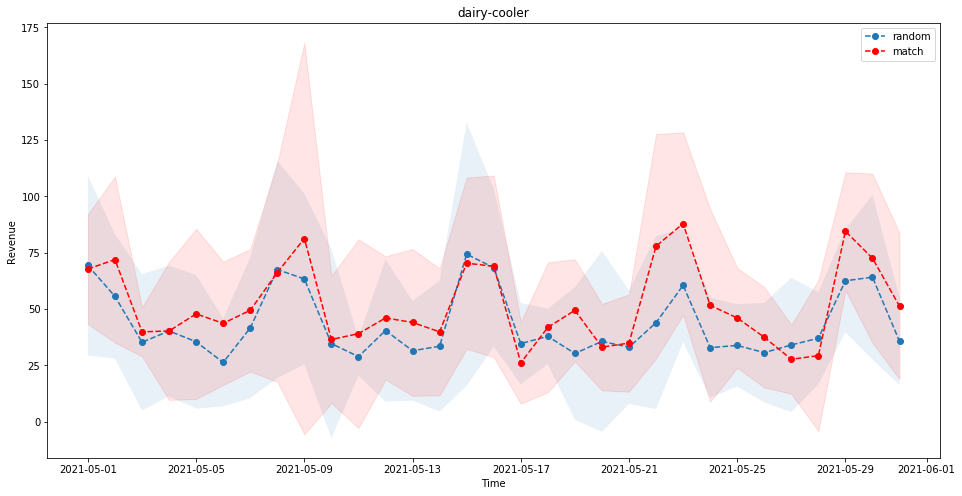

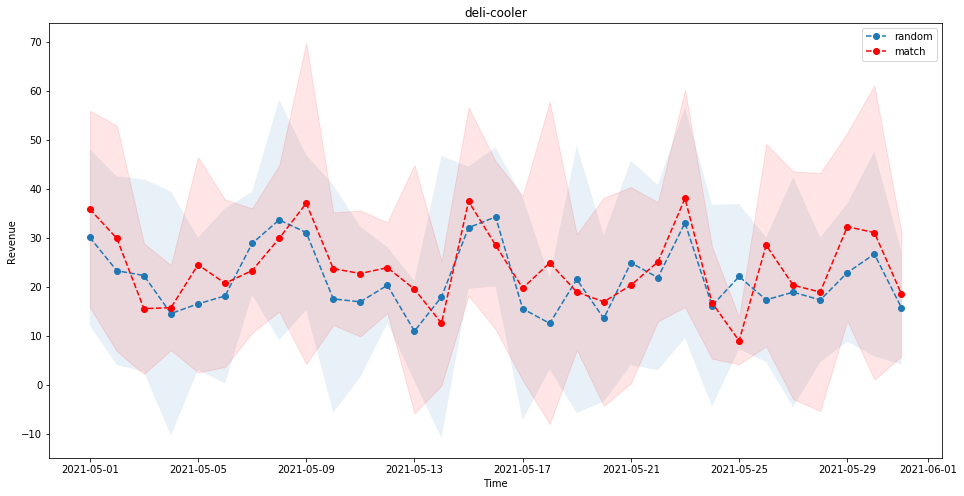

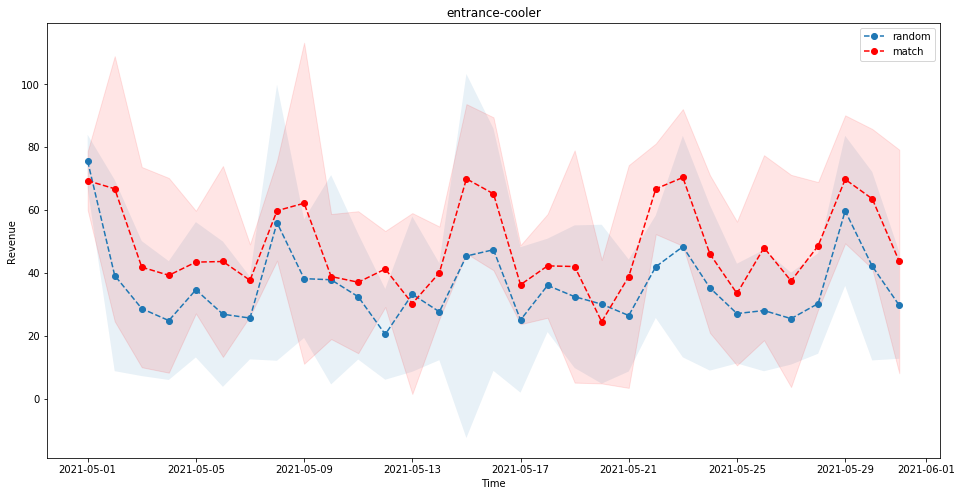

In [16]:
for d in display_list:
    
    rand_disp = random_policy[random_policy['display'] == d]
    match_disp = match_policy[match_policy['display'] == d]
    static_disp = static_policy[static_policy['display'] ==d]
    
    fig = plt.figure(figsize=(16, 8))
    
    # random
    plt.plot(rand_disp["date"], rand_disp["revenue"], "--", marker='o',  label='random')
    plt.fill_between(rand_disp["date"],rand_disp["lower"], rand_disp["upper"], alpha=.1)
    # match
    plt.plot(match_disp["date"], match_disp["revenue"], "--", marker='o', color='red',  label='match')
    plt.fill_between(match_disp["date"],match_disp["lower"], match_disp["upper"], alpha=.1, color='red')
    # static
    #plt.plot(static_disp["date"], static_disp["revenue"], "--", marker='o', color='green',  label='static')
    #plt.fill_between(static_disp["date"],static_disp["lower"], static_disp["upper"], alpha=.1, color='green')
    
    
    
    plt.title(d)
    plt.xlabel("Time")
    plt.ylabel("Revenue")
    plt.legend(loc='best')